# Principios Estadísticos Fundamentales para la Ciencia de Datos

Este módulo está diseñado para guiar a los principiantes a través de los pilares estadísticos que sustentan la ciencia de datos, partiendo desde conceptos extremadamente básicos hasta ideas más avanzadas. El objetivo es ofrecer una visión clara y orientada a la aplicación práctica, evitando la complejidad innecesaria del formalismo matemático para priorizar la intuición y la interpretación. A lo largo de estas páginas, exploraremos cómo la estadística descriptiva nos permite conocer nuestros datos, cómo la inferencia estadística nos permite generalizar hallazgos, y cómo la teoría de la probabilidad y las distribuciones de probabilidad son herramientas indispensables para modelar incertidumbre y construir predicciones robustas.

## La Estadística Descriptiva
*Conociendo tus datos*

Antes de poder realizar análisis complejos o construir modelos sofisticados, un científico de datos debe comenzar por comprender y describir las características de los datos con los que trabaja. Esta tarea inicial es abordada por la **estadística descriptiva**, una rama de la estadística enfocada en la recopilación, organización, resumen y presentación de datos numéricos para identificar sus rasgos principales. Su propósito fundamental es simplificar grandes volúmenes de información en un conjunto de métricas y representaciones gráficas manejables que revelen patrones, tendencias y anomalías. En el contexto de la ciencia de datos, este primer paso es crucial porque un modelo entrenado sobre datos mal comprendidos producirá resultados erróneos, independientemente de su complejidad. La estadística descriptiva no busca hacer inferencias sobre una población más grande; simplemente describe los datos disponibles.

## Medidas de Tendencia Central
El núcleo de la estadística descriptiva reside en dos tipos de medidas: las de **tendencia central** y las de **dispersión**. Las medidas de tendencia central buscan identificar un valor "típico" o central alrededor del cual se agrupan los datos. Las tres más importantes son la media, la mediana y la moda.

![](https://aprendiendoadministracion.com/wp-content/uploads/2016/02/graf21.png)
* *Medidas de tendencia central*
* Fuente: https://aprendiendoadministracion.com/medidas-de-tendencia-central-media-mediana-moda-rango-y-eje-medio/

### Media
**Media** Es el promedio aritmético, calculado sumando todos los valores y dividiendo por la cantidad total de ellos. Por ejemplo, si las calificaciones de un estudiante son 85, 90, 78 y 92, la media es (85+90+78+92)/4 = 86.25. La media actúa como un punto de equilibrio o centro de gravedad del conjunto de datos.

### Mediana
**Mediana** Es el valor que se encuentra en el centro de un conjunto de datos ordenados de menor a mayor. Si el número de datos es par, la mediana es el promedio de los dos valores centrales. Por ejemplo, en la lista [1, 3, 3, 6, 7, 8, 9], la mediana es 6. En la lista [1, 2, 3, 4, 5, 6, 7, 8], la mediana es (4+5)/2 = 4.5. Una característica clave de la mediana es su resistencia al sesgo causado por valores atípicos o extremos, lo que la hace preferible en distribuciones asimétricas.

### Moda
**Moda** Es el valor que aparece con mayor frecuencia en un conjunto de datos. Puede haber más de una moda si varios valores tienen la misma frecuencia máxima, o ninguna moda si todos los valores son únicos. Es especialmente útil para datos categóricos nominales.

| Característica | Media | Mediana | Moda |
| :--- | :--- | :--- | :--- |
| **Definición** | Promedio aritmético | Valor central en datos ordenados | Valor más frecuente |
| **Sensibilidad a Outliers** | Alta | Baja (Resistente) | No aplica (categórico) |
| **Aplicación** | Cuantitativa continua/skewness | Cuantitativa/skewed data | Cualitativa/categórica |
| **Ejemplo** | (2+4+6+8)/4 = 5 | Lista impar: [1,3,5] → 3; <br>Par: [1,2,3,4] → 2.5 | [1,1,2,2,2,3] → Moda = 2 |

In [7]:
"""
Cálculo de medidas de tendencia central: media, mediana y moda.
"""
from scipy import stats
import numpy as np

# Usamos el array 'datos' para calcular las medidas
datos = np.array([4, 8, 6, 5, 3, 3, 4, 6, 8, 9, 10, 3, 7])
media = np.mean(datos)
mediana = np.median(datos)
moda = stats.mode(datos, keepdims=True).mode[0]

print(f"Media: {media:.2f}")
print(f"Mediana: {mediana:.2f}")
print(f"Moda: {moda:.2f}")

Media: 5.85
Mediana: 6.00
Moda: 3.00



## Medidas de Dispersión
Las medidas de dispersión, por otro lado, cuantifican la variabilidad o esparcimiento de los datos alrededor de la medida de tendencia central. Son igualmente cruciales porque describen la consistencia de los datos.

### Rango
**Rango:** Es la diferencia entre el valor máximo y el mínimo del conjunto de datos. Es fácil de calcular pero muy sensible a los valores atípicos.

### Varianza
La **Varianza ($\sigma^2$)** Mide el promedio de las diferencias al cuadrado de cada dato respecto a la media. Al elevar al cuadrado las diferencias, se asegura que los valores positivos y negativos no se cancelen, y se da más peso a las observaciones más alejadas de la media. Sin embargo, sus unidades son las de los datos originales al cuadrado, lo que puede dificultar su interpretación directa.
#### Varianza Poblacional

La **varianza poblacional** mide el promedio de las desviaciones al cuadrado de cada observación respecto a la media de toda la población. Su fórmula es:

$$
\sigma^2 = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2
$$

**Donde:**

- $\sigma^2$ (sigma cuadrada): **Varianza poblacional**. Es la medida de dispersión que queremos calcular.
- $N$: **Tamaño total de la población** (número de observaciones en la población completa).
- $x_i$: **Valor de la $i$-ésima observación** en la población.
- $\mu$ (mu): **Media poblacional**, calculada como $\mu = \frac{1}{N} \sum_{i=1}^{N} x_i$.
- $\sum_{i=1}^{N}$: **Sumatoria** que indica que se deben sumar las desviaciones al cuadrado para todas las observaciones desde $i = 1$ hasta $i = N$.


> **Nota:** Se eleva al cuadrado la diferencia $(x_i - \mu)$ para evitar que las desviaciones positivas y negativas se cancelen entre sí, y para dar mayor peso a los valores que están más alejados de la media.

#### Varianza Muestral
La **varianza muestral** estima la varianza de una población a partir de una muestra. Su fórmula es:
$$
S^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

**Donde:**

- $S^2$ (S cuadrada): **Varianza muestral**. Es la medida de dispersión que queremos calcular.
- $n$: **Tamaño de la muestra** (número de observaciones en la muestra).
- $x_i$: **Valor de la $i$-ésima observación** en la muestra.
- $\bar{x}$ (x barra): **Media muestral**, calculada como $\bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i$.
- $\sum_{i=1}^{n}$: **Sumatoria** que indica que se deben sumar las desviaciones al cuadrado para todas las observaciones desde $i = 1$ hasta $i = n$.


> **Nota:** Se eleva al cuadrado la diferencia $(x_i - \bar{x})$ para evitar que las desviaciones positivas y negativas se cancelen entre sí, y para dar mayor peso a los valores que están más alejados de la media.

### Desviación Estándar
**Desviación Estándar ($\sigma$):** Es la raíz cuadrada de la varianza. Es la medida de dispersión más utilizada porque vuelve a las unidades a las originales de los datos, facilitando su interpretación. Una desviación estándar baja indica que los datos están agrupados cerca de la media, mientras que una alta indica que los datos están más dispersos.

La formula de la desviacion estandar es:
$$
\sigma = \sqrt{\sigma^2}
$$  
**Donde:**
- $\sigma$ (sigma): **Desviación estándar poblacional**. Es la medida de dispersión que queremos calcular.
- $\sigma^2$ (sigma cuadrada): **Varianza poblacional**. Es la medida de dispersión que queremos calcular.


### Ejemplo de Cálculo de Medidas de Dispersión
Consideremos el conjunto de datos: [4, 8, 6, 5, 3, 7]
1. **Rango:**
   - Valor máximo = 8
   - Valor mínimo = 3
   - Rango = 8 - 3 = 5  
2. **Varianza:**
   - Media ($\bar{x}$) = (4 + 8 + 6 + 5 + 3 + 7) / 6 = 5.5
   - Desviaciones al cuadrado:
     - (4 - 5.5)² = 2.25
     - (8 - 5.5)² = 6.25
     - (6 - 5.5)² = 0.25
     - (5 - 5.5)² = 0.25
     - (3 - 5.5)² = 6.25
     - (7 - 5.5)² = 2.25
   - Varianza ($S^2$) = (2.25 + 6.25 + 0.25 + 0.25 + 6.25 + 2.25) / (6 - 1) = 17.5 / 5 = 3.5
3. **Desviación Estándar:** $S = \sqrt{S^2} = \sqrt{3.5} \approx 1.87$     
La desviación estándar de aproximadamente 1.87 indica que, en promedio, los datos se desvían de la media en esa cantidad.

In [15]:
"""
Ejemplo de cálculo de medidas de dispersión usando el array 'datos' definido anteriormente.
"""
datos = np.array([4, 8, 6, 5, 3, 3, 4, 6, 8, 9, 10, 3, 7])

# Rango
rango = np.max(datos) - np.min(datos)

# Varianza muestral (n-1 en el denominador)
varianza = np.var(datos, ddof=1) # qué es ddof ?
# ddof significa "delta degrees of freedom" (grados de libertad). Al establecer ddof=1, estamos calculando la varianza muestral, que utiliza n-1 en el denominador en lugar de n. Esto corrige el sesgo en la estimación de la varianza a partir de una muestra.

# Desviación estándar muestral
desviacion_estandar = np.std(datos, ddof=1)

print(f"Rango: {rango}")
print(f"Varianza muestral: {varianza:.2f}")
print(f"Desviación estándar muestral: {desviacion_estandar:.2f}")

Rango: 7
Varianza muestral: 5.81
Desviación estándar muestral: 2.41


## Herramientas gráficas
Además de estas medidas, la estadística descriptiva utiliza diversas herramientas gráficas. Los **histogramas** son diagramas de barras que muestran la frecuencia de datos dentro de intervalos consecutivos, revelando la forma o distribución de los datos. Los **diagramas de caja (box plots)** visualizan la distribución de los datos a través de su cinco números resumen: mínimo, primer cuartil (Q1), mediana, tercer cuartil (Q3) y máximo, destacando eficazmente los valores atípicos. Otras medidas de posición incluyen los **cuartiles** (dividen los datos en cuatro partes iguales) y los **percentiles** (dividen los datos en cien partes iguales), que son útiles para evaluar el rendimiento relativo de una observación dentro de un grupo. En resumen, la estadística descriptiva es el proceso de limpieza, exploración y resumen inicial que prepara el camino para todas las fases posteriores del análisis de datos.

### Histogramas
Un histograma es una representación gráfica que organiza un conjunto de datos numéricos en intervalos (o "bins") y muestra la frecuencia de datos dentro de cada intervalo mediante barras. A diferencia de un gráfico de barras tradicional, que se utiliza para datos categóricos, un histograma es ideal para datos continuos y ayuda a visualizar la distribución de los datos.

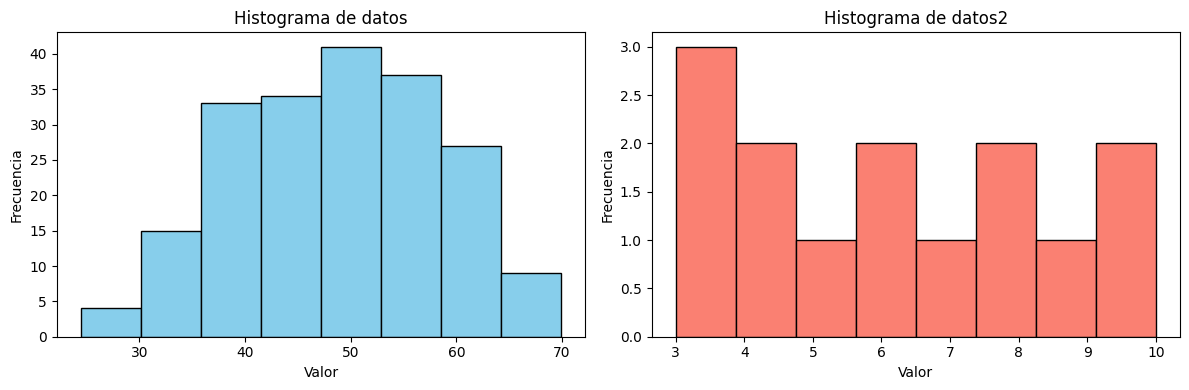

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Generar datos de ejemplo (distribución normal)
datos = np.random.normal(loc=50, scale=10, size=200)
datos2 = np.array([4, 8, 6, 5, 3, 3, 4, 6, 8, 9, 10, 3, 7, 10])

plt.figure(figsize=(12, 4))

# Histograma para 'datos'
plt.subplot(1, 2, 1)
plt.hist(datos, bins=8, color='skyblue', edgecolor='black')
plt.title('Histograma de datos')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

# Histograma para 'datos2'
plt.subplot(1, 2, 2)
plt.hist(datos2, bins=8, color='salmon', edgecolor='black')
plt.title('Histograma de datos2')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


### Diagramas de Caja (Box Plots)
Un diagrama de caja, o box plot, es una herramienta gráfica que resume la distribución de un conjunto de datos a través de sus cinco números resumen: 
- mínimo, 
- primer cuartil (Q1), 
- mediana, 
- tercer cuartil (Q3) y 
- máximo. 

El box plot muestra la mediana como una línea dentro de la caja, que representa el rango intercuartílico (IQR, por sus siglas en inglés), que es la distancia entre Q1 y Q3. Los "bigotes" se extienden desde la caja hasta los valores mínimo y máximo, excluyendo los valores atípicos, que se representan como puntos individuales fuera de los bigotes.

![Histogram](../images/boxplot-1.webp)
* *Box plot de ejemplo*

![Box Plot](https://upload.wikimedia.org/wikipedia/commons/1/1a/Boxplot_vs_PDF.svg)
* *Box plot comparado con una función de densidad de probabilidad (PDF)*
* *Fuente: [Wikimedia Commons](https://commons.wikimedia.org/wiki/File:Boxplot_vs_PDF.svg)*

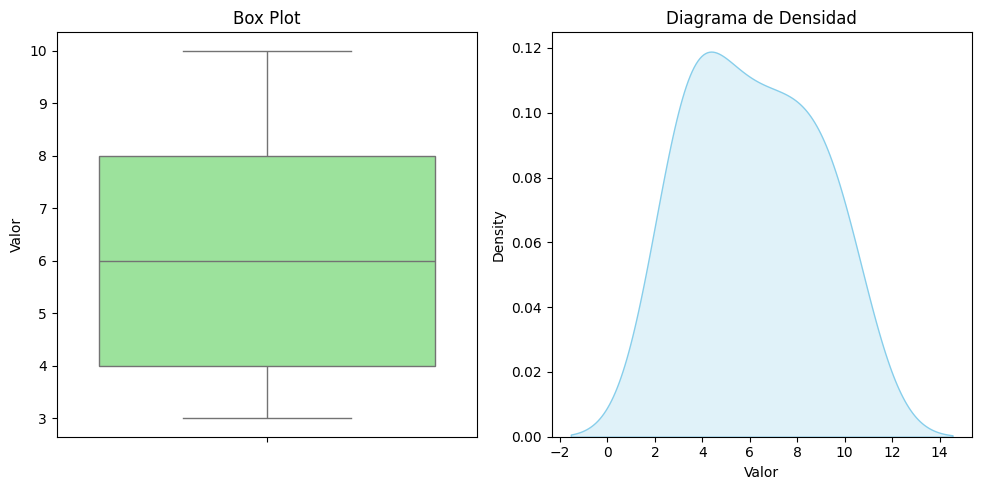

In [12]:
"""
Visualización de datos con diagramas de caja (box plots) y diagramas de densidad (KDE).
"""
import seaborn as sns
import matplotlib.pyplot as plt

datos = np.array([4, 8, 6, 5, 3, 3, 4, 6, 8, 9, 10, 3, 7, 10])
# Usamos los datos ya definidos en el notebook
plt.figure(figsize=(10, 5))

# Diagrama de caja (box plot)
plt.subplot(1, 2, 1)
sns.boxplot(y=datos, color='lightgreen')
plt.title('Box Plot')
plt.ylabel('Valor')

# Diagrama de densidad (KDE)
plt.subplot(1, 2, 2)
sns.kdeplot(datos, fill=True, color='skyblue')
plt.title('Diagrama de Densidad')
plt.xlabel('Valor')

plt.tight_layout()
plt.show()